###Recurrent Neural Network
###Data Preprocessing
###Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set





In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
print(dataset_train)


            Date    Open    High     Low   Close      Volume  Unnamed: 6
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500         NaN
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400         NaN
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300         NaN
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900         NaN
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800         NaN
...          ...     ...     ...     ...     ...         ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400         NaN
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100         NaN
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800         NaN
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300         NaN
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000         NaN

[1258 rows x 7 columns]


### Feature Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output


In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

###Building the RNN
### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


### Initialising the RNN


In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation


In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation


In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation


In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation


In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer


In [ ]:
regressor.add(Dense(units = 1))


### Compiling the RNN


In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


### Fitting the RNN to the Training set


In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0395
Epoch 2/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0038
Epoch 13/100


### Making the predictions and visualising the results
### Getting the real stock price of 2017


In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


### Getting the predicted stock price of 2017


In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results


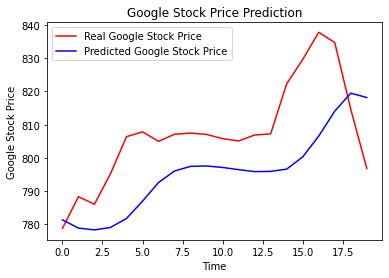

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()